# Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
# Reading all the tables
df = pd.read_excel (r'Retail_dataset.xlsx')
order = pd.read_excel (r'Retail_dataset.xlsx', sheet_name='orders')
order_items = pd.read_excel (r'Retail_dataset.xlsx', sheet_name='order_items')
customers = pd.read_excel (r'Retail_dataset.xlsx', sheet_name='customers')
payments = pd.read_excel (r'Retail_dataset.xlsx', sheet_name='payments')
products = pd.read_excel (r'Retail_dataset.xlsx', sheet_name='products')

# ORDERS

In [4]:
print(order)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1      53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
2      47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
3      949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
4      ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  6359f309b166b0196dbf7ad2ac62bb5a   
99437  63943bddc261676b46f01ca7ac2f7bd8  da62f9e57a76d978d02ab5362c509660   
99438  83c1379a015df1e13d02aae0204711ab  737520a9aad80b3fbbdad19b66b37b30   
99439  11c177c8e97725db2631073c19f07b62  5097a5312c8b157bb7be58ae360ef43c   
99440  66dea50a8b16d9b4dee7af250b4be1a5  60350aa974b26ff12caad89e55993bd6   

      order_status order_purchase_timestamp   order_approved_at  \
0       

In [5]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [6]:
order.shape

(99441, 7)

In [7]:
# check for null values
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
# we have taken median of differences between order_approved_at and order_purchased and then filled the nan values with sum of order_purchased and diff
diff = (order['order_approved_at'] - order['order_purchase_timestamp']).median()
order['order_approved_at'].fillna(order['order_purchase_timestamp'] + diff,inplace=True)

In [9]:
# we have taken median of differences between order_delivered_carrier_date and order_approved_at and then filled the nan values with sum of order_approved_at and diff
diff = (order['order_delivered_timestamp'] - order['order_approved_at']).median()
order['order_delivered_timestamp'].fillna(order['order_approved_at'] + diff,inplace=True)

In [10]:
# creating one more column delayed or not where 0=within time and 1=delayed
order['delayed'] = np.where(order['order_delivered_timestamp']>order['order_estimated_delivery_date'],1,0)

In [11]:
# creating new column ie. delivery time duration = time duration between delivered to customer date and purchase timestamp
order['delivery_time_duration'] = order['order_delivered_timestamp'] - order['order_purchase_timestamp']

In [12]:
# check for duplicated values
order.duplicated().sum()

0

In [13]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delayed,delivery_time_duration
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,0,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,0,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,0,2 days 20:58:23


# ITEMS

In [14]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [15]:
order_items.shape

(112650, 6)

In [16]:
#Check for null in order_items
order_items.isnull().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [17]:
#Check for duplicated values
order_items.duplicated().sum()

0

In [18]:
#Description of order_items data
order_items.describe()

,order_item_id,price,shipping_charges
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


 # CUSTOMERS

In [19]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
customers.shape

(99441, 4)

In [21]:
#Check for null value
customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [22]:
#Checking for duplicate values of customer_id in customer table
customers['customer_id'].duplicated().sum()

3345

In [23]:
#Describe data for customers table
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


# PAYMENTS

In [24]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [25]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [26]:
#checking for null values
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

# PRODUCTS

In [27]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [28]:
products.shape

(32951, 6)

In [29]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [30]:
#Checking for null values
per_product = products.isnull().sum()
per_product

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [31]:
#Checking for null values in percentage
round(100*(per_product/len(products.index)),2)

product_id               0.00
product_category_name    0.52
product_weight_g         0.01
product_length_cm        0.01
product_height_cm        0.01
product_width_cm         0.01
dtype: float64

# Insight:

  ###  1. The percentage of missing or null value is very low, so we will fill the minute missing values by finding the median value for each dataset

In [32]:
products['product_weight_g'].fillna(products['product_weight_g'].mean(),inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].mean(),inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].mean(),inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].mean(),inplace=True)

In [33]:
#Rechecking for null values
products.isnull().sum()

product_id                 0
product_category_name    170
product_weight_g           0
product_length_cm          0
product_height_cm          0
product_width_cm           0
dtype: int64

## MERGING DATAFRAMES

In [34]:
ord_prod =pd.merge(order_items, products, on="product_id", how="outer", indicator=True)
ord_prod.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,both
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0,both
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0,both
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0,both
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,both


In [35]:
cust_ord =pd.merge(order, customers, on="customer_id", how="outer", indicator=True)
cust_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delayed,delivery_time_duration,customer_zip_code_prefix,customer_city,customer_state,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,both
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,both
2,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,0,1 days 07:53:42,3149,sao paulo,SP,both
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,0,1 days 07:53:42,3149,sao paulo,SP,both
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08,47813,barreiras,BA,both


In [36]:
ord_pay = pd.merge(cust_ord, payments, on="order_id", how="outer")
ord_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delayed,delivery_time_duration,customer_zip_code_prefix,customer_city,customer_state,_merge,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,both,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,both,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,both,2.0,voucher,1.0,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,both,1.0,credit_card,1.0,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,sao paulo,SP,both,3.0,voucher,1.0,2.00


In [37]:
ord_final = pd.merge(ord_pay, ord_prod, on="order_id", how="outer")
ord_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delayed,delivery_time_duration,customer_zip_code_prefix,...,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge_y
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,both
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,both
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,both
3,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,both
4,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40,3149,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,both


In [38]:
ord_final=ord_final.drop({'_merge_x','_merge_y'},axis='columns')

In [39]:
ord_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128585 entries, 0 to 128584
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       128585 non-null  object         
 1   customer_id                    128585 non-null  object         
 2   order_status                   128585 non-null  object         
 3   order_purchase_timestamp       128585 non-null  datetime64[ns] 
 4   order_approved_at              128585 non-null  datetime64[ns] 
 5   order_delivered_timestamp      128585 non-null  datetime64[ns] 
 6   order_estimated_delivery_date  128585 non-null  datetime64[ns] 
 7   delayed                        128585 non-null  int32          
 8   delivery_time_duration         128585 non-null  timedelta64[ns]
 9   customer_zip_code_prefix       128585 non-null  int64          
 10  customer_city                  128585 non-null  object  

In [40]:
ord_final.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_timestamp           0
order_estimated_delivery_date       0
delayed                             0
delivery_time_duration              0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
order_item_id                     987
product_id                        987
seller_id                         987
price                             987
shipping_charges                  987
product_category_name            1463
product_weight_g                  987
product_length_cm                 987
product_height_cm                 987
product_width_cm                  987
dtype: int64

## EXPLORATORY DATA ANALYSIS AFTER MERGING DATAFRAMES

In [41]:
# Most number of product delivered
ord_final.product_category_name.value_counts().nlargest(10)

toys                     95727
health_beauty             3389
bed_bath_table            3094
sports_leisure            2641
furniture_decor           2504
computers_accessories     2461
housewares                1926
watches_gifts             1685
telephony                 1318
garden_tools              1187
Name: product_category_name, dtype: int64

### Insight: The maximum number of product delivered is Toys

<AxesSubplot:xlabel='customer_city'>

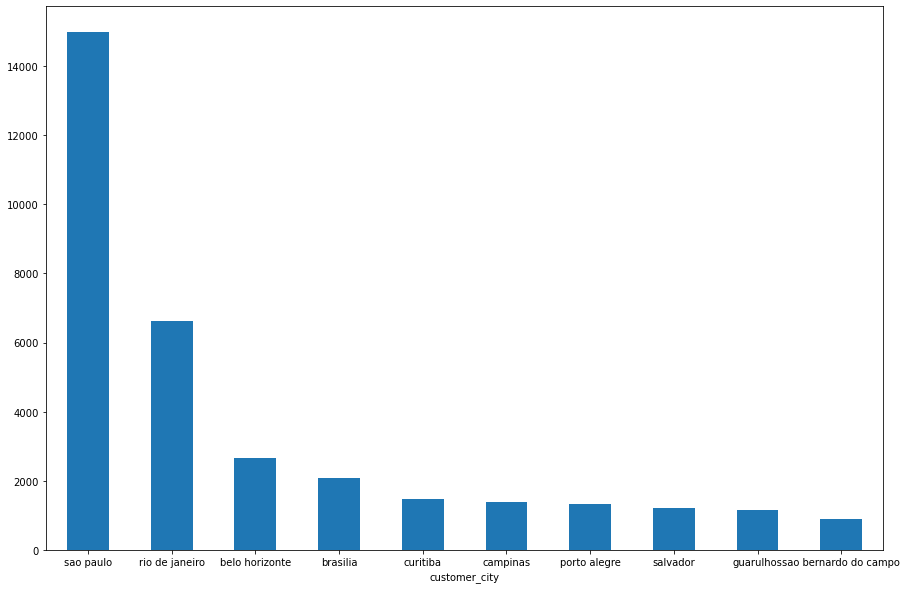

In [42]:
c1=customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
c1.head(10)
c2= c1.head(10)
plt.figure(figsize=(15,10))
c2.plot(kind='bar',rot=0)

#### Insight: The maximum number of customers are from Sao Paulo and second highest is from Rio de Janerio.

In [43]:
order["order_purchase_timestamp"] = pd.to_datetime(order["order_purchase_timestamp"], format='%d-%m-%Y %H:%M')
order["order_approved_at"] = pd.to_datetime(order["order_approved_at"], format='%d-%m-%Y %H:%M')
order["order_delivered_timestamp"] = pd.to_datetime(order["order_delivered_timestamp"], format='%d-%m-%Y %H:%M')
order["order_estimated_delivery_date"] = pd.to_datetime(order["order_estimated_delivery_date"], format='%d-%m-%Y %H:%M')
order.dtypes

order_id                                  object
customer_id                               object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                 datetime64[ns]
order_delivered_timestamp         datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
delayed                                    int32
delivery_time_duration           timedelta64[ns]
dtype: object

<AxesSubplot:xlabel='order_purchase_timestamp'>

<Figure size 1152x720 with 0 Axes>

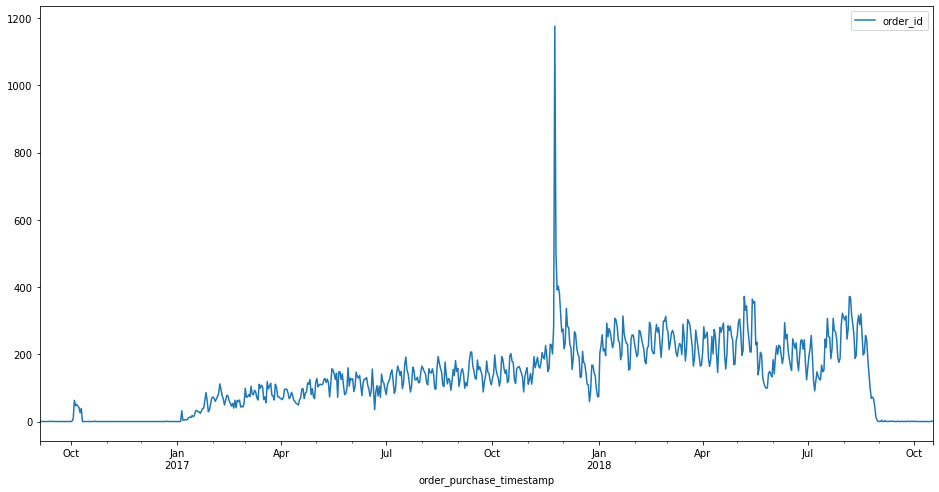

In [44]:
counts=order.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='D')).count()
fig=plt.figure(figsize=(16,10))
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
counts.plot(y = "order_id", use_index=True, ax=ax)

### Insight- From the graph above we can see that there is a peak in the region of Christmas.


## Distribution of Payment Mode 

Text(0.5, 1.0, 'Distribution of modes of payment')

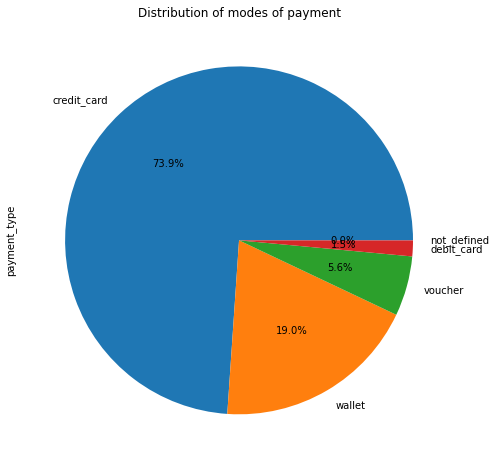

In [45]:
plt.figure(figsize=(8,8))
payments['payment_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of modes of payment')

### Insight: From the above pie-chart we can conclude that 74% approx payment is done through Credit card and 19% is done through wallet.

In [46]:
pay_cr =  ord_pay[ord_pay['payment_type']=='credit card']
pay_cr.describe()

,delayed,delivery_time_duration,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,0.0,0,0.0,0.0,0.0,0.0
mean,NaN,NaT,NaN,NaN,NaN,NaN
std,NaN,NaT,NaN,NaN,NaN,NaN
min,NaN,NaT,NaN,NaN,NaN,NaN
25%,NaN,NaT,NaN,NaN,NaN,NaN
50%,NaN,NaT,NaN,NaN,NaN,NaN
75%,NaN,NaT,NaN,NaN,NaN,NaN
max,NaN,NaT,NaN,NaN,NaN,NaN


## MARKET BASKET ANALYSIS